In [21]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas
import pydicom

J = os.path.join

root = J(os.environ["DATASET_ROOT"], "Breast-Cancer-Detection-2022")

In [22]:
pat_id = 5
pat_folder = J(root, "train_images_processed_512", str(pat_id))
files = os.listdir(pat_folder)
files

['640805896.png', '1633417959.png', '1351088028.png', '940388076.png']

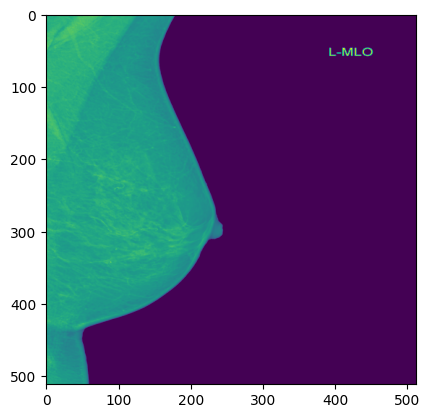

In [29]:
img = Image.open(J(pat_folder, files[0]))
plt.imshow(img)

In [24]:
print(np.array(img).min(), np.array(img).max())

0 255


# Read DICOM

In [39]:
def read_image(path: str, size=(512,512)):
    dicom = pydicom.read_file(path)
    data = dicom.pixel_array
    if dicom.PhotometricInterpretation == "MONOCHROME1":
        data = np.amax(data) - data
    data = data - np.min(data)
    data = data / np.max(data)
    data = (data * 255).astype(np.uint8)
    return Image.fromarray(data).resize((size))

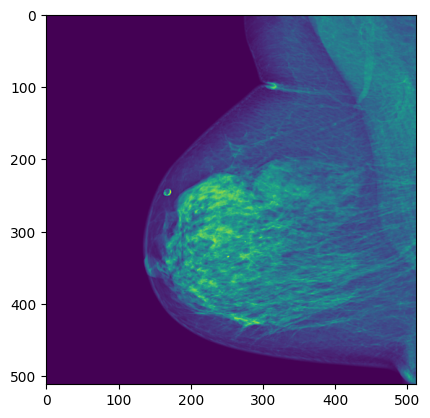

In [40]:
img = read_image(J(root, "test_images", "10008", "68070693.dcm"))
plt.imshow(img)

In [41]:
print(np.array(img).min(), np.array(img).max())

0 255
